In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from CloudSaturation import CloudSaturation


/Users/joosko/work/ijs/ml/SentinelHub/venv/lib/python3.6/site-packages/tifffile/tifffile.py:7685: UserWarning: No module named 'tifffile._tifffile'
  Functionality might be degraded or be slow.

  warnings.warn('%s%s' % (e, warn))


In [2]:
def plot_cloud_mask(mask, figsize=(15,15), cmap="gray", normalize=False, plot_cmap=False):
    """
    Utility function for plotting a binary cloud mask.
    """
    plt.figure(figsize=figsize)
    plot = plt.subplot(1, 1, 1)
    if not normalize:
        vmin_vmax = {"vmin":0, "vmax":1}
    else:
        vmin_vmax = dict()
    plot.imshow(mask, cmap=cmap, **vmin_vmax)
    # Todo: plot nice cmap

def plot_image(data, factor=1./255, cmap=None):
    """
    Utility function for plotting RGB images. The numpy arrays returned by the WMS and WCS requests have channels
    ordered as Blue (`B02`), Green (`B03`), and Red (`B04`) therefore the order has to be reversed before ploting 
    the image.
    """
    fig = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))
    rgb = data.astype(np.float32)
    if len(rgb.shape) == 3 and rgb.shape[2] == 3:
        rgb = rgb[..., [2, 1, 0]]
    plt.imshow(rgb * factor, cmap=cmap)
    

def plot_timeseries(data, factor=1./255, cmap="gray"):
    """
    Utility function for ploting timeseries type data.
    """
    
    
    return plot_image(np.array([data]), cmap=cmap)


def get_timeseries(mask, true_c, bands, dates, cloud_masks, x_ind, y_ind, band_ind):
    # Filter images
    # Choose 0 band as reference for non photographed
    nonzero_image_indices = np.nonzero(bands[:,x_ind, y_ind, 0])
    nonzero_cloud_indices = np.nonzero(cloud_masks[:,x_ind, y_ind])
    both_nonzero = np.intersect1d(nonzero_image_indices, nonzero_cloud_indices)
    
    return bands[both_nonzero, x_ind, y_ind, band_ind], dates[both_nonzero]

In [3]:
# Requesting size of Slovenia BB results in error "The bounding box area is too large! Please zoom in."
tulip_box = [52.89906593845727, 4.71038818359375,52.95205098150524, 4.798278808593751]
cloud_sat = CloudSaturation(tulip_box)
# This bounding box is also small enough so that all images are from the same tile -> no problems with cut-off

Saved True color
Saved bands
Downloaded
Detected


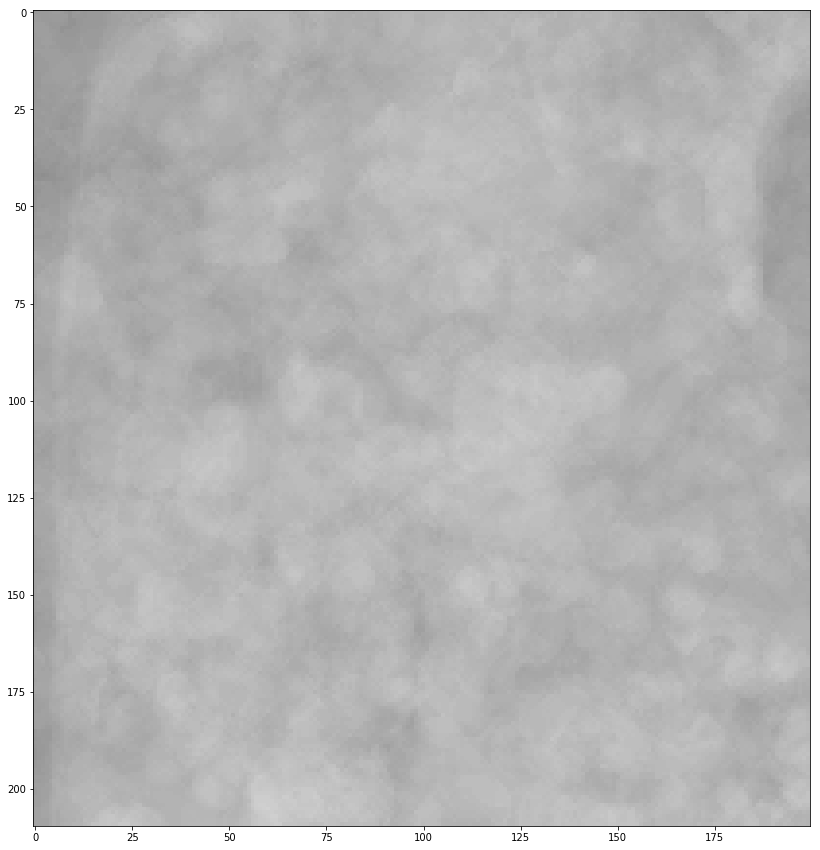

In [4]:
mask, true_c, bands, dates, cloud_masks = cloud_sat.get_cloud_saturation_mask()
plot_cloud_mask(mask)

In [5]:
grayscale = cloud_sat.get_full_index_timeseries("MOISTURE-GRAYSCALE2")

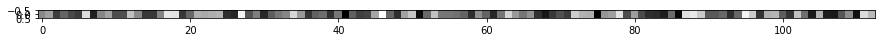

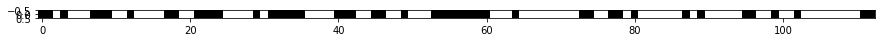

In [6]:
#Sample timeseries plot of MOISTURE-GRAYSCALE2 index
x_ind = 3
y_ind = 4
plot_timeseries(grayscale[:,x_ind,y_ind])
# Filter with cloud data
cf=cloud_sat.get_cloud_filter(x_ind,y_ind)
ka = np.zeros(grayscale[:,x_ind,y_ind].shape)
ka[cf] = 1
# White are clouds
plot_timeseries(ka, cmap="gray")

In [7]:
# Dates of cloudy images
cloudy_dates = dates[cf]